In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('CO22339_Soil_Profile.csv')
X = dataset.iloc[:, 1:2].values
Y = dataset.iloc[:, 2].values

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
imputer = imputer.fit(X[:,0:1])
X[:,0:2] = imputer.transform(X[:,0:2])
Y = imputer.fit_transform(Y.reshape(-1, 1))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X = scaler.fit_transform(X)
Y = scaler.fit_transform(Y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size= 1/3, random_state= 0)

In [ ]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, Y)

LinearRegression()

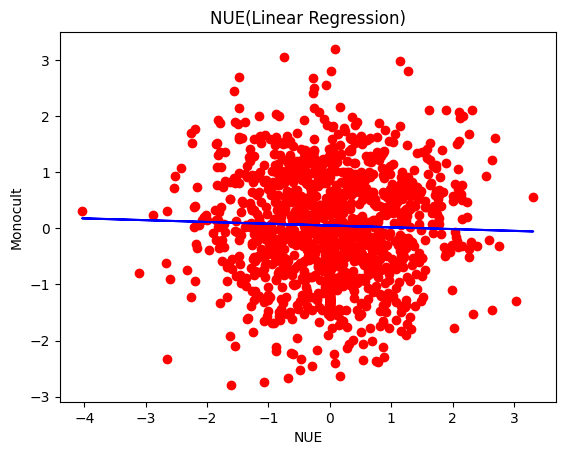

In [ ]:
plt.scatter(X, Y, color='red')
plt.plot(X, lin_model.predict(X), color = 'blue')
plt.title('NUE(Linear Regression)')
plt.xlabel('NUE')
plt.ylabel('Monocult')
plt.show()

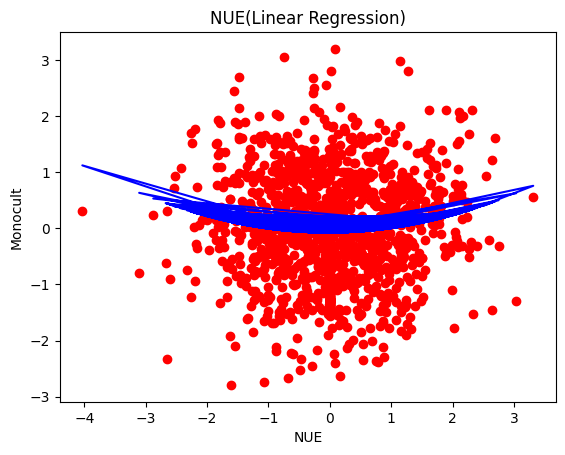

In [ ]:
plt.scatter(X, Y, color = 'red' )
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X) ), color = 'blue')
plt.title('NUE(Linear Regression)')
plt.xlabel('NUE')
plt.ylabel('Monocult')
plt.show()

<ipython-input-109-c2d9874feb41>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


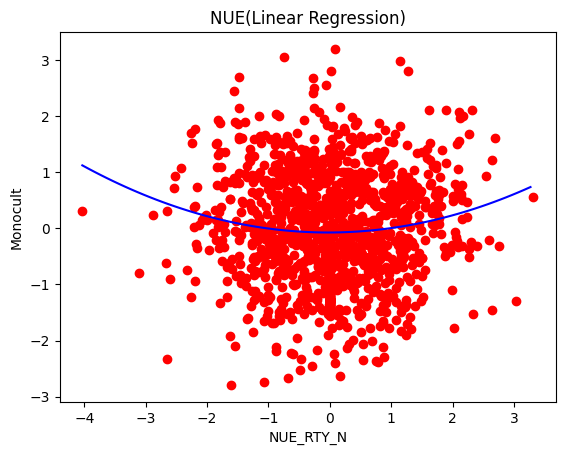

In [ ]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter( X, Y, color = 'red' )
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid) ), color = 'blue')
plt.title('NUE(Linear Regression)')
plt.xlabel('NUE_RTY_N')
plt.ylabel('Monocult')
plt.show()

In [ ]:
Y_pred = lin_reg_2.predict(poly_reg.fit_transform(X_test))

In [ ]:
lin_model.predict([[6.5]])
# Predicting a new result with Polynomial Regression
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([[3.10313208]])

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, Y_pred)

1.0715881847721185

In [ ]:
dataset.tail()

,monocult,RYT_N,NUE
1218,2.383726,1.382059,232.097659
1219,2.486679,1.763341,202.150987
1220,1.828689,1.831690,280.567357
1221,1.685196,1.419341,316.236501
1222,1.033197,1.672211,416.133918
